In [1]:
import sys
sys.path.append('../') 

In [2]:
from pipeline import Solar_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
Thickness = pd.read_csv('../data/Thickness.csv')
Thickness = Thickness.drop([33]) # 9-1 drop
Thickness.reset_index(drop=True, inplace=True)
Thickness

,Thickness
0,48.266667
1,47.966667
2,48.166667
3,48.600000
4,59.533333
...,...
122,84.633333
123,98.366667
124,97.033333
125,96.266667


In [21]:
def apply_histogram_equalization(img_array):
    """Apply histogram equalization to the image."""
    img_yuv = cv2.cvtColor(img_array, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

def apply_zscore_normalization(img_array):
    """Apply Z-Score normalization to the image."""
    mean_pixel = np.mean(img_array)
    std_dev_pixel = np.std(img_array)
    normalized = (img_array - mean_pixel) / std_dev_pixel
    return normalized.astype(np.float32)

def apply_minmax_normalization(img_array):
    """Apply Min-Max normalization to the image."""
    min_pixel = np.min(img_array)
    max_pixel = np.max(img_array)
    normalized = (img_array - min_pixel) / (max_pixel - min_pixel)
    return normalized.astype(np.float32)

def apply_clahe(img_array):
    """Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to the image."""
    img_yuv = cv2.cvtColor(img_array, cv2.COLOR_RGB2YUV)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

img_path = '../data/box_img/'
top_img_list = [f'Top_{i}.jpg' for i in range(0, 127)]
bot_img_list = [f'Bot_{i}.jpg' for i in range(0, 127)]

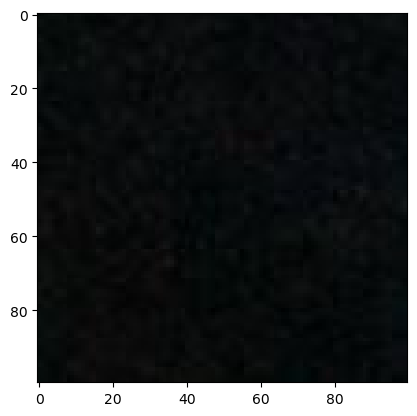

In [29]:
sample_top = cv2.imread(img_path + 'Top/' + top_img_list[0])
plt.imshow(sample_top)

In [38]:
def apply_histogram_equalization(img_array):
    """Apply histogram equalization to the image."""
    img_yuv = cv2.cvtColor(img_array, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

def apply_zscore_normalization(img_array):
    """Apply Z-Score normalization to the image."""
    mean_pixel = np.mean(img_array)
    std_dev_pixel = np.std(img_array)
    normalized = (img_array - mean_pixel) / std_dev_pixel
    return normalized.astype(np.float32)

def apply_minmax_normalization(img_array):
    """Apply Min-Max normalization to the image."""
    min_pixel = np.min(img_array)
    max_pixel = np.max(img_array)
    normalized = (img_array - min_pixel) / (max_pixel - min_pixel)
    return normalized.astype(np.float32)

def apply_clahe(img_array):
    """Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to the image."""
    img_yuv = cv2.cvtColor(img_array, cv2.COLOR_RGB2YUV)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

def returnRGB_average(img_array):
    """Return the average of RGB values of the image."""
    return np.mean(img_array, axis=(0, 1))

img_path = '../data/box_img/'
top_img_list = [f'Top_{i}.jpg' for i in range(0, 127)]
bot_img_list = [f'Bot_{i}.jpg' for i in range(0, 127)]

top_img_histogram = []
bot_img_histogram = []

top_img_zscore = []
bot_img_zscore = []

top_img_minmax = []
bot_img_minmax = []

top_img_clahe = []
bot_img_clahe = []

for img in top_img_list:
    img_array = cv2.imread(img_path + 'Top/' + img)
   # img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
   # img_array = cv2.resize(img_array, (224, 224))
   # img_array = img_array / 255.0
   # img_array = img_array.astype(np.float32)
    
    top_img_histogram.append(apply_histogram_equalization(img_array))
    top_img_zscore.append(apply_zscore_normalization(img_array))
    top_img_minmax.append(apply_minmax_normalization(img_array))
    top_img_clahe.append(apply_clahe(img_array))
    


In [39]:
top_img_histogram

[array([[[ 11,  16,  14],
         [ 43,  48,  46],
         [136, 141, 139],
         ...,
         [245, 249, 250],
         [216, 220, 221],
         [168, 172, 173]],
 
        [[136, 141, 139],
         [136, 141, 139],
         [136, 141, 139],
         ...,
         [239, 243, 244],
         [195, 199, 200],
         [136, 140, 141]],
 
        [[230, 235, 233],
         [216, 221, 219],
         [136, 141, 139],
         ...,
         [230, 234, 235],
         [195, 199, 200],
         [136, 140, 141]],
 
        ...,
 
        [[134, 141, 139],
         [134, 141, 139],
         [101, 106, 104],
         ...,
         [101, 105, 106],
         [136, 140, 141],
         [136, 140, 141]],
 
        [[ 99, 106, 104],
         [134, 141, 139],
         [101, 106, 104],
         ...,
         [ 24,  28,  29],
         [ 43,  47,  48],
         [ 71,  75,  76]],
 
        [[ 99, 106, 104],
         [ 99, 106, 104],
         [101, 106, 104],
         ...,
         [  3,   7,   8],
  

In [33]:
len(top_img_histogram)

100

## Histogram Equalization

In [32]:
Histogram_Equalization = pd.DataFrame(
    {'Top_R': [i[0]for i in top_img_histogram], 
     'Top_G': [i[1]for i in top_img_histogram],
     'Top_B': [i[2]for i in top_img_histogram],
     'Bot_R': [i[0]for i in bot_img_histogram],
     'Bot_G': [i[1]for i in bot_img_histogram],
     'Bot_B': [i[2]for i in bot_img_histogram],
     'Thickness': Thickness['Thickness']}
)

Histogram_Equalization.to_csv('../data/Histogram_Equalization_w_B.csv', index = False)
Histogram_Equalization = Histogram_Equalization.drop(['Bot_R', 'Bot_G', 'Bot_B'], axis = 1)
Histogram_Equalization.to_csv('../data/Histogram_Equalization.csv', index = False)

Z_Score = pd.DataFrame(
    {'Top_R': [i[0]for i in top_img_zscore],
        'Top_G': [i[1]for i in top_img_zscore],
        'Top_B': [i[2]for i in top_img_zscore],
        'Bot_R': [i[0]for i in bot_img_zscore],
        'Bot_G': [i[1]for i in bot_img_zscore],
        'Bot_B': [i[2]for i in bot_img_zscore],
        'Thickness': Thickness['Thickness']}
)

Z_Score.to_csv('../data/ZScore_Normalization_w_B.csv', index = False)
Z_Score = Z_Score.drop(['Bot_R', 'Bot_G', 'Bot_B'], axis = 1)
Z_Score.to_csv('../data/ZScore_Normalization.csv', index = False)

Min_Max = pd.DataFrame(
    {'Top_R': [i[0]for i in top_img_minmax],
        'Top_G': [i[1]for i in top_img_minmax],
        'Top_B': [i[2]for i in top_img_minmax],
        'Bot_R': [i[0]for i in bot_img_minmax],
        'Bot_G': [i[1]for i in bot_img_minmax],
        'Bot_B': [i[2]for i in bot_img_minmax],
        'Thickness': Thickness['Thickness']}
)

Min_Max.to_csv('../data/MinMax_Normalization_w_B.csv', index = False)
Min_Max = Min_Max.drop(['Bot_R', 'Bot_G', 'Bot_B'], axis = 1)
Min_Max.to_csv('../data/MinMax_Normalization.csv', index = False)

ValueError: array length 100 does not match index length 127

## Z score normalization

In [24]:
import cv2

def get_RGB_avg(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    r, g, b = cv2.split(img)
    r_avg = np.average(r)
    g_avg = np.average(g)
    b_avg = np.average(b)
    return r_avg, g_avg, b_avg

Top_path = '../data/box_img/Top/'
Bot_path = '../data/box_img/Bot/'


Top_img_list = os.listdir(Top_path)
Bot_img_list = os.listdir(Bot_path)

def zscore_normalization(img):
    """
    Z-score normalization
    """
    img = np.float32(img)
    mean = np.mean(img)
    std = np.std(img)
    img = (img - mean) / std
    return img

top_avg_rgb = []
bot_avg_rgb = []

for i in Top_img_list:
    img = cv2.imread(Top_path + i)
    img = zscore_normalization(img)
    top_avg_rgb.append(get_RGB_avg(img))
    
for i in Bot_img_list:
    img = cv2.imread(Bot_path + i)
    img = zscore_normalization(img)
    bot_avg_rgb.append(get_RGB_avg(img))
    
    
Zscore_Normalization = pd.DataFrame({'Top_R': [i[0] for i in top_avg_rgb], 'Top_G': [i[1] for i in top_avg_rgb], 'Top_B': [i[2] for i in top_avg_rgb],
              'Bot_R' : [i[0] for i in bot_avg_rgb], 'Bot_G' : [i[1] for i in bot_avg_rgb], 'Bot_B' : [i[2] for i in bot_avg_rgb],
              'Thickness': Thickness['Thickness']})

Zscore_Normalization.to_csv('../data/Zscore_Normalization_w_B.csv', index = False)

Zscore_Normalization = Zscore_Normalization.drop(['Bot_R', 'Bot_G', 'Bot_B'], axis = 1)

Zscore_Normalization.to_csv('../data/Zscore_Normalization.csv', index = False)

## MinMax normalization

In [25]:
import cv2

def get_RGB_avg(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    r, g, b = cv2.split(img)
    r_avg = np.average(r)
    g_avg = np.average(g)
    b_avg = np.average(b)
    return r_avg, g_avg, b_avg

Top_path = '../data/box_img/Top/'
Bot_path = '../data/box_img/Bot/'


Top_img_list = os.listdir(Top_path)
Bot_img_list = os.listdir(Bot_path)

def MinMaxNormalization(img):
    img = img.astype('float32')
    img -= np.min(img)
    img /= np.max(img)
    return img

top_avg_list = []
bot_avg_list = []

for i in range(len(Top_img_list)):
    top_img = cv2.imread(Top_path + Top_img_list[i])
    top_img = MinMaxNormalization(top_img)
    top_avg = get_RGB_avg(top_img)
    top_avg_list.append(top_avg)

for i in range(len(Bot_img_list)):
    bot_img = cv2.imread(Bot_path + Bot_img_list[i])
    bot_img = MinMaxNormalization(bot_img)
    bot_avg = get_RGB_avg(bot_img)
    bot_avg_list.append(bot_avg)
    
    
MinMax_Normalization = pd.DataFrame({'Top_R': [i[0] for i in top_avg_rgb], 'Top_G': [i[1] for i in top_avg_rgb], 'Top_B': [i[2] for i in top_avg_rgb],
              'Bot_R' : [i[0] for i in bot_avg_rgb], 'Bot_G' : [i[1] for i in bot_avg_rgb], 'Bot_B' : [i[2] for i in bot_avg_rgb],
              'Thickness': Thickness['Thickness']})

MinMax_Normalization.to_csv('../data/MinMax_Normalization_w_B.csv', index = False)

MinMax_Normalization = MinMax_Normalization.drop(['Bot_R', 'Bot_G', 'Bot_B'], axis = 1)

MinMax_Normalization.to_csv('../data/MinMax_Normalization.csv', index = False)
